In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [2]:
iris=datasets.load_iris()

In [3]:
print("Features ",iris.feature_names)
print("\n Target ", iris.target_names)

Features  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 Target  ['setosa' 'versicolor' 'virginica']


In [4]:
X=pd.DataFrame(iris.data)
X.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [5]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y=pd.DataFrame(iris.target)
y.columns=['Targets']

In [7]:
y

,Targets
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


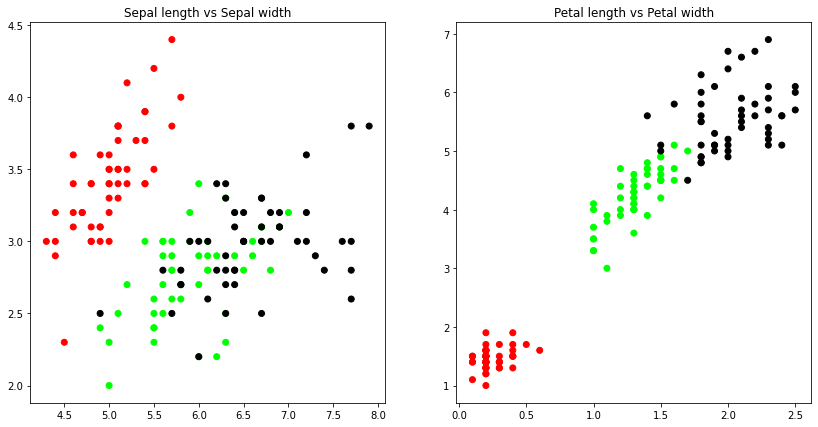

In [8]:
plt.figure(figsize=(14,7))
colormap=np.array(['red', 'lime','black'])
plt.subplot(1,2,1)
plt.scatter(X.sepal_length,X.sepal_width,c=colormap[y.Targets])
plt.title('Sepal length vs Sepal width')
plt.subplot(1,2,2)
plt.scatter(X.petal_width,X.petal_length,c=colormap[y.Targets])
plt.title('Petal length vs Petal width')
plt.show()

In [9]:
model=KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [10]:
l1=[0,1,2]
def rename(s):
    l2=[]
    for i in s:
        if i not in l2:
            l2.append(i)
    for i in range(len(s)):
        pos=l2.index(s[i])
        s[i]=l1[pos]
    return s

In [11]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [12]:
km=rename(model.labels_)

In [13]:
print("Accuracy ",sm.accuracy_score(y,km))
print("\n Confusion matrix \n",sm.confusion_matrix(y,km))

Accuracy  0.8933333333333333

 Confusion matrix 
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


In [14]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)

GaussianMixture(n_components=3)

In [15]:
y_cluster_gmm=gmm.predict(xs)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
em=rename(y_cluster_gmm)
print(sm.accuracy_score(y,em))
print(sm.confusion_matrix(y,em))

0.9666666666666667
[[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]
